<a href="https://colab.research.google.com/github/khanhtran2000/OCR-Dev/blob/master/Image_Preprocessing_and_Loading_Model_Bymerge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2 as cv
import matplotlib.pyplot as plt

# Image preprocessing module
from PIL import Image, ImageFilter

In [4]:
# Load dataset
mapp = pd.read_csv('/content/drive/My Drive/EMNIST/emnist-bymerge-mapping.txt',
    delimiter=' ',
    names=['ASCII']
    )

mapp.head()

,ASCII
0,48
1,49
2,50
3,51
4,52


In [5]:
string_list = [chr(i) for i in mapp['ASCII'].values]
string_list
mapp['String'] = string_list
mapp

,ASCII,String
0,48,0
1,49,1
2,50,2
3,51,3
4,52,4
5,53,5
6,54,6
7,55,7
8,56,8
9,57,9


In [6]:
# Load model
model = load_model('/content/drive/My Drive/EMNIST/model/emnist_model_bymerge.h5')
model

In [7]:
# Path to image
file = "/content/drive/My Drive/EMNIST/images/crop/crop19.jpg"

# Load image 
image = cv.imread(file, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image / 255.0 # Normalize and convert to float
image = image.tolist() 

new_image = []

# Create a list of all pixels 
for pixel_list in image:
    for pixel in pixel_list:
        new_image.append(pixel)

len(new_image)

784

In [0]:
# Threshold value 
thres_black = 0.25

In [0]:
newer_image = []

# Change background to black, character to white
for pixel in new_image:
    pixel = 1 - pixel
    if pixel < thres_black:
        pixel = 0
    newer_image.append(pixel)


In [10]:
def reshape_ima(image):
    image = image.reshape(28, 28)
    return image 

# Reshape
newer_image = np.apply_along_axis(reshape_ima, 0, newer_image)
print(type(newer_image))
print(newer_image.shape)
print(newer_image[0][0])
print(type(newer_image[0][0]))

<class 'numpy.ndarray'>
(28, 28)
0.0
<class 'numpy.float64'>


In [11]:
# Reshape again, this time to 4 dimension to feed into the model
newer_image = newer_image.reshape(1, 28, 28, 1)

newer_image.shape

(1, 28, 28, 1)

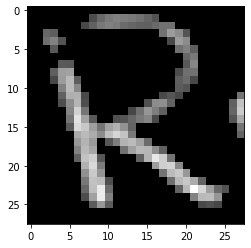

In [12]:
# Plotting
plt.imshow(newer_image.reshape(28, 28), cmap='gray')
plt.show()

In [15]:
# Predict
pred = model.predict_classes(newer_image)

print(pred)

[27]


In [14]:
mapp['String'][pred]

27    R
Name: String, dtype: object